In [1]:
import pandas as pd 
import numpy as np 

In [2]:
train = pd.read_csv("C:/Users/coren/python/pyproj/Machine learning/SpaceTitanic/data/train.csv")
test = pd.read_csv('C:/Users/coren/python/pyproj/Machine learning/SpaceTitanic/data/test.csv')
sample_submission = pd.read_csv('C:/Users/coren/python/pyproj/Machine learning/SpaceTitanic/data/sample_submission.csv')

In [3]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [5]:
sample_submission.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


# Objectif : 

### Prédire si les échantillons du test set ont été transportés ou pas 

## Méthode de résolution : 

- analyse des données 
- pré-traitement des données 
- apprentissage supervisé sur les données train 
- métriques de performance du modèle   (trouver le meilleur modèle possible : DNN, Ensemble learning...)
- prédiction sur le fichier test 
- transposition des résultats sur les fichier sample_submission

### Analyse sur train et test

In [6]:
len(train)

8693

In [7]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [8]:
len(test)

4277

In [9]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

stratégie par rapport aux NaN : 
- on les exclut 
- on les remplace par moyenne/médiane
- on les prédit grâce à algorithme KNN

### D'abord, vérifier si tous les echantillons nuls sont répartis aléatoirement ou si on a des individus pr lesquels on a 0 infos 

In [10]:
train[train.CryoSleep.isnull()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
92,0099_02,Earth,NaN,G/12/P,TRAPPIST-1e,2.0,False,0.0,0.0,0.0,0.0,0.0,Thewis Connelson,True
98,0105_01,Earth,NaN,F/21/P,TRAPPIST-1e,27.0,False,0.0,0.0,570.0,2.0,131.0,Carry Cleachrand,False
104,0110_02,Europa,NaN,B/5/P,TRAPPIST-1e,40.0,False,0.0,331.0,0.0,0.0,1687.0,Aldeba Bootious,False
111,0115_01,Mars,NaN,F/24/P,TRAPPIST-1e,26.0,False,0.0,0.0,0.0,0.0,NaN,Rohs Pead,True
152,0173_01,Earth,NaN,E/11/S,TRAPPIST-1e,58.0,False,0.0,985.0,0.0,5.0,0.0,Hilip Grifford,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8620,9197_01,Europa,NaN,C/308/P,55 Cancri e,44.0,False,0.0,0.0,0.0,0.0,0.0,Bellus Platch,True
8651,9227_05,Earth,NaN,G/1498/P,TRAPPIST-1e,8.0,False,0.0,0.0,0.0,0.0,0.0,Hard Hinglendez,False
8664,9246_01,Earth,NaN,G/1490/S,TRAPPIST-1e,32.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True
8675,9259_01,Earth,NaN,F/1893/P,TRAPPIST-1e,44.0,False,1030.0,1015.0,0.0,11.0,NaN,Annah Gilleyons,True


- ok on a plutôt l'impression d'avoir des suppressions d'information random 
- ne sait pas comment bien évaluer le fait que les NaN soient répartis aléatoirement
- go tester le KNN pour prédire valeurs manquantes

## Remplacer les valeurs numériques manquantes avec algorithme KNN

In [11]:
import math 

In [12]:
print(math.sqrt(len(train))) 

93.23625904121208


In [13]:
from sklearn.impute import KNNImputer

In [14]:
imputer = KNNImputer(n_neighbors=round(math.sqrt(len(train))), add_indicator=False)

### KNN est basé sur des calculs de proximité entre échantillons, il faut donc prendre en compte le fait qu'on ait des données catégoriques

sinon on obtient par exemple "NameError: name 'LabelEncoder' is not defined"


In [15]:
num = [col for col in train.columns if train[col].dtypes != 'O']

In [16]:
num

['Age',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Transported']

In [17]:
imputer.fit(train[num])

KNNImputer(n_neighbors=93)

In [18]:
imputer.transform(train[num])

array([[3.900e+01, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.400e+01, 1.090e+02, 9.000e+00, ..., 5.490e+02, 4.400e+01,
        1.000e+00],
       [5.800e+01, 4.300e+01, 3.576e+03, ..., 6.715e+03, 4.900e+01,
        0.000e+00],
       ...,
       [2.600e+01, 0.000e+00, 0.000e+00, ..., 1.000e+00, 0.000e+00,
        1.000e+00],
       [3.200e+01, 0.000e+00, 1.049e+03, ..., 3.530e+02, 3.235e+03,
        0.000e+00],
       [4.400e+01, 1.260e+02, 4.688e+03, ..., 0.000e+00, 1.200e+01,
        1.000e+00]])

In [19]:
pd.DataFrame(imputer.transform(train[num]))

,0,1,2,3,4,5,6
0,39.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0,1.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0.0
4,16.0,303.0,70.0,151.0,565.0,2.0,1.0
...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,0.0
8689,18.0,0.0,0.0,0.0,0.0,0.0,0.0
8690,26.0,0.0,0.0,1872.0,1.0,0.0,1.0
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,0.0


Les 6 premières colonnes sont les données qui ont été transformées et les 6 dernières des indicateurs pour savoir quelle colonne a été modifiée 

In [20]:
pd.DataFrame(imputer.transform(train[num])).isnull().sum().sum()

0

on a bien 0 valeurs manquantes dans le dataFrame

In [21]:
trainWithoutNumNan = pd.DataFrame(imputer.transform(train[num]))
trainWithoutNumNan.head()

,0,1,2,3,4,5,6
0,39.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0,1.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0.0
4,16.0,303.0,70.0,151.0,565.0,2.0,1.0


In [22]:
train[num] = imputer.transform(train[num])

In [23]:
train[num].head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,39.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0,1.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0.0
4,16.0,303.0,70.0,151.0,565.0,2.0,1.0


cette méthode permet de garder les noms des colonnes

In [24]:
train[num].isnull().sum().sum()

0

In [25]:
obj = [col for col in train.columns if train[col].dtypes == 'O']

In [26]:
train[obj].head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,False,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,False,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,True,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,False,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,False,Willy Santantines


In [27]:
train =  pd.concat([train[num], train[obj]], axis=1)

## Même manip pour le dataFrame Test

In [28]:
num2 = [col for col in test.columns if test[col].dtypes != 'O']

In [29]:
imputer2 = KNNImputer(n_neighbors=round(math.sqrt(len(test))), add_indicator=False)

In [30]:
imputer2.fit(test[num2])

KNNImputer(n_neighbors=65)

In [31]:
imputer2.transform(test[num2])

array([[  27.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ],
       [  19.        ,    0.        ,    9.        ,    0.        ,
        2823.        ,    0.        ],
       [  31.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ],
       ...,
       [  26.64615385,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ],
       [  30.90769231,    0.        , 2680.        ,    0.        ,
           0.        ,  523.        ],
       [  43.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ]])

In [32]:
test[num2] = imputer2.transform(test[num2])

In [33]:
test[num2]

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,27.000000,0.0,0.0,0.0,0.0,0.0
1,19.000000,0.0,9.0,0.0,2823.0,0.0
2,31.000000,0.0,0.0,0.0,0.0,0.0
3,38.000000,0.0,6652.0,0.0,181.0,585.0
4,20.000000,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...
4272,34.000000,0.0,0.0,0.0,0.0,0.0
4273,42.000000,0.0,847.0,17.0,10.0,144.0
4274,26.646154,0.0,0.0,0.0,0.0,0.0
4275,30.907692,0.0,2680.0,0.0,0.0,523.0


In [34]:
test[num2].isnull().sum().sum()

0

In [35]:
test[obj].head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,False,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,False,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,False,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,False,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,False,Brence Harperez


In [36]:
test =  pd.concat([test[num2], test[obj]], axis=1)

In [37]:
test.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
0,27.0,0.0,0.0,0.0,0.0,0.0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,False,Nelly Carsoning
1,19.0,0.0,9.0,0.0,2823.0,0.0,0018_01,Earth,False,F/4/S,TRAPPIST-1e,False,Lerome Peckers
2,31.0,0.0,0.0,0.0,0.0,0.0,0019_01,Europa,True,C/0/S,55 Cancri e,False,Sabih Unhearfus
3,38.0,0.0,6652.0,0.0,181.0,585.0,0021_01,Europa,False,C/1/S,TRAPPIST-1e,False,Meratz Caltilter
4,20.0,10.0,0.0,635.0,0.0,0.0,0023_01,Earth,False,F/5/S,TRAPPIST-1e,False,Brence Harperez


## Gérer les valeurs manquantes de type 'object' (non numériques)

### 4 solutions : 

- les supprimer
- les remplacer par la plus fréquente
- les remplacer par une constante
- développer un modèle pour prédire chaque valeur 


## 1 - Supprimer les lignes

train.dropna(axis=0, inplace=True)

train.head()

## 2 - Plus fréquente 

train.fillna(train.model().iloc[i])

train.head()

ici, i = le num de la colonne où on prend la valeur la plus fréquente, il faut donc utiliser ce code sur chaque colonne où on a des NaN de type object

Dans notre jeu de données, ce type de méthode peut s'avérer inutile, par exemple pour des variables telles que le nom

## 3 - Supprimer les variables 

train.dropna(axis=1, inplace=True)

train.head()

utilse si il manque trop d'informations dans une certaine colonne 

## 4 - Modèle de prédiction 

– lire et charger le dataset

– transformer les données manquantes en données de test 

– transformer les données non-manquantes en données d'entrainement

– séparer les variables dépendantes et indépendantes

In [38]:
traincopy =  pd.read_csv("C:/Users/coren/python/pyproj/Machine learning/SpaceTitanic/data/train.csv")

In [39]:
traincopy.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [40]:
traincopy.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

On a bien les données numériques qui ont été prédites, on va maintenant essayer de prédire la homePlanet

Il faut faire attention pour ce genre de prédictions, des données telles que le nom ne peuvent pas être prédites ainsi, cela n'aurait aucun sens 

In [41]:
traincopy[traincopy.HomePlanet.isnull()].head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
59,0064_02,NaN,True,E/3/S,TRAPPIST-1e,33.0,False,0.0,0.0,NaN,0.0,0.0,Colatz Keen,True
113,0119_01,NaN,False,A/0/P,TRAPPIST-1e,39.0,False,0.0,2344.0,0.0,65.0,6898.0,Batan Coning,False
186,0210_01,NaN,True,D/6/P,55 Cancri e,24.0,False,0.0,0.0,NaN,0.0,0.0,Arraid Inicont,True
225,0242_01,NaN,False,F/46/S,TRAPPIST-1e,18.0,False,313.0,1.0,691.0,283.0,0.0,Almone Sté,False
234,0251_01,NaN,True,C/11/S,55 Cancri e,54.0,False,0.0,0.0,0.0,0.0,0.0,Diphah Amsive,True


### Pré-traitement des données pour pouvoir faire de l'apprentissage

In [42]:
traincopy = traincopy.drop(['Name','Transported' ],axis=1)

car ces infos ne vont pas nous être utiles pour déterminer la planète d'origine

In [43]:
traincopy[traincopy.HomePlanet.isnull()].isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep         2
Cabin             6
Destination       4
Age               2
VIP               3
RoomService       6
FoodCourt         2
ShoppingMall      7
Spa               3
VRDeck            1
dtype: int64

In [44]:
traintrain = traincopy[traincopy.HomePlanet.isnull()==False]
trainpred = traincopy[traincopy.HomePlanet.isnull()]

In [45]:
traintrain = traintrain.dropna(axis=0)

In [46]:
traintrain.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0


In [47]:
X_train = traintrain.iloc[:, 2:13]
y_train = traintrain.iloc[:,1]

on doit transformer les données texte en float avec du one hot encoding 

In [48]:
obj = [col for col in X_train.columns if X_train[col].dtypes == 'O']

In [49]:
obj

['CryoSleep', 'Cabin', 'Destination', 'VIP']

In [50]:
X_trainProcessed = pd.get_dummies(X_train, columns = obj)

In [51]:
X_train.head()

,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0
1,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0
2,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0
3,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0
4,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0


In [52]:
X_trainProcessed.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CryoSleep_False,CryoSleep_True,Cabin_A/0/P,Cabin_A/0/S,...,Cabin_G/999/P,Cabin_G/999/S,Cabin_T/1/P,Cabin_T/2/P,Cabin_T/3/P,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
0,39.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,24.0,109.0,9.0,25.0,549.0,44.0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,1
3,33.0,0.0,1283.0,371.0,3329.0,193.0,1,0,0,1,...,0,0,0,0,0,0,0,1,1,0
4,16.0,303.0,70.0,151.0,565.0,2.0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [53]:
X_trainProcessed.isnull().sum().sum()

0

In [54]:
y_train.isnull().sum()

0

In [55]:
print(len(X_trainProcessed))
print(len(y_train))

6764
6764


### Création et entrainement d'un modèle de random forest

In [56]:
from sklearn import ensemble

In [57]:
# Split the dataset into 70% Training and 30% Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_trainProcessed, y_train, test_size=0.3,random_state=0)

In [58]:
rf_clf = ensemble.RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)
score_rf =rf_clf.score(X_test, y_test)
print("Score d'exactitude de la forêt aléatoire:",  score_rf)


Score d'exactitude de la forêt aléatoire: 0.7591133004926108


In [59]:
y_predrf = rf_clf.predict(X_test)

In [60]:
len(y_predrf)

2030

In [61]:
len(y_test)

2030

In [62]:
uniqueTest, countsTest = np.unique(y_test, return_counts=True)
resultTest = np.column_stack((uniqueTest, countsTest)) 
print (resultTest)

[['Earth' 1093]
 ['Europa' 520]
 ['Mars' 417]]


In [63]:
uniqueTest, countsTest = np.unique(y_predrf, return_counts=True)
resultTest = np.column_stack((uniqueTest, countsTest)) 
print (resultTest)

[['Earth' 1382]
 ['Europa' 435]
 ['Mars' 213]]


### Affichage de matrice de confusion pour évaluer les résultats 

In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [65]:
cmrf = confusion_matrix(y_test, y_predrf, labels=np.unique(y_test))
cmrf

array([[1005,   49,   39],
       [ 146,  368,    6],
       [ 231,   18,  168]], dtype=int64)

In [66]:

cmrf_obj = ConfusionMatrixDisplay(cmrf, display_labels=np.unique(y_test))


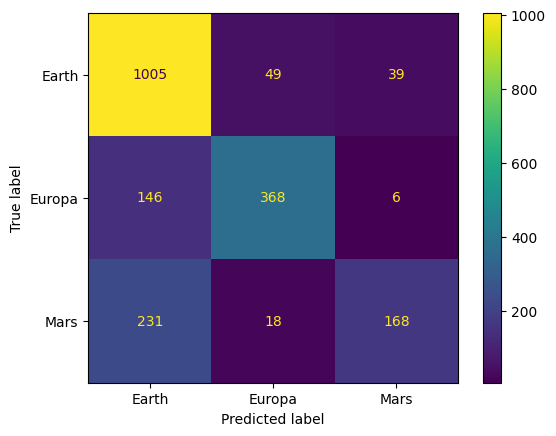

In [67]:
cmrf_obj.plot()

### Affichage des feature importance

In [68]:
# Saving feature names for later use
feature_list = list(X_trainProcessed.columns)

In [69]:
# Get numerical feature importances
importances = list(rf_clf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances [:10]]

Variable: FoodCourt            Importance: 0.08
Variable: Age                  Importance: 0.07
Variable: RoomService          Importance: 0.06
Variable: Spa                  Importance: 0.05
Variable: VRDeck               Importance: 0.05
Variable: ShoppingMall         Importance: 0.04
Variable: Destination_55 Cancri e Importance: 0.02
Variable: Destination_PSO J318.5-22 Importance: 0.02
Variable: CryoSleep_False      Importance: 0.01
Variable: CryoSleep_True       Importance: 0.01


[None, None, None, None, None, None, None, None, None, None]

affichage des 10 variables les plus importantes

### Ce travail a l'air très laborieux, on va donc plutôt décider de laisser les NaN pour les attributs non numériques

# Réaliser un apprentissage avec les fichiers train et test

## 1 - Avec une random forest

In [70]:
train.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,False,Maham Ofracculy
1,24.0,109.0,9.0,25.0,549.0,44.0,1.0,0002_01,Earth,False,F/0/S,TRAPPIST-1e,False,Juanna Vines
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0.0,0003_01,Europa,False,A/0/S,TRAPPIST-1e,True,Altark Susent
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0.0,0003_02,Europa,False,A/0/S,TRAPPIST-1e,False,Solam Susent
4,16.0,303.0,70.0,151.0,565.0,2.0,1.0,0004_01,Earth,False,F/1/S,TRAPPIST-1e,False,Willy Santantines


In [71]:
train.drop('Name', inplace=True, axis=1)
train.drop('PassengerId', inplace=True, axis=1)

In [72]:
train.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet,CryoSleep,Cabin,Destination,VIP
0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Europa,False,B/0/P,TRAPPIST-1e,False
1,24.0,109.0,9.0,25.0,549.0,44.0,1.0,Earth,False,F/0/S,TRAPPIST-1e,False
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0.0,Europa,False,A/0/S,TRAPPIST-1e,True
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0.0,Europa,False,A/0/S,TRAPPIST-1e,False
4,16.0,303.0,70.0,151.0,565.0,2.0,1.0,Earth,False,F/1/S,TRAPPIST-1e,False


In [73]:
X_train1 = train.iloc[:, 0:6]
X_train2 = train.iloc[:, 7:12]
y_train = train.iloc[:,6]

In [74]:
y_train

0       0.0
1       1.0
2       0.0
3       0.0
4       1.0
       ... 
8688    0.0
8689    0.0
8690    1.0
8691    0.0
8692    1.0
Name: Transported, Length: 8693, dtype: float64

In [75]:
X_train= pd.concat([X_train1,X_train2],axis=1)

In [76]:
X_train.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet,CryoSleep,Cabin,Destination,VIP
0,39.0,0.0,0.0,0.0,0.0,0.0,Europa,False,B/0/P,TRAPPIST-1e,False
1,24.0,109.0,9.0,25.0,549.0,44.0,Earth,False,F/0/S,TRAPPIST-1e,False
2,58.0,43.0,3576.0,0.0,6715.0,49.0,Europa,False,A/0/S,TRAPPIST-1e,True
3,33.0,0.0,1283.0,371.0,3329.0,193.0,Europa,False,A/0/S,TRAPPIST-1e,False
4,16.0,303.0,70.0,151.0,565.0,2.0,Earth,False,F/1/S,TRAPPIST-1e,False


In [77]:
obj = [col for col in X_train.columns if X_train[col].dtypes == 'O']

In [78]:
X_trainProcessed = pd.get_dummies(X_train, columns = obj)

In [79]:
X_trainProcessed

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,...,Cabin_T/0/P,Cabin_T/1/P,Cabin_T/2/P,Cabin_T/2/S,Cabin_T/3/P,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
0,39.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,...,0,0,0,0,0,0,0,1,1,0
1,24.0,109.0,9.0,25.0,549.0,44.0,1,0,0,1,...,0,0,0,0,0,0,0,1,1,0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,1
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,1,...,0,0,0,0,0,0,0,1,1,0
4,16.0,303.0,70.0,151.0,565.0,2.0,1,0,0,1,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1
8689,18.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
8690,26.0,0.0,0.0,1872.0,1.0,0.0,1,0,0,1,...,0,0,0,0,0,0,0,1,1,0
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,0,1,0,1,...,0,0,0,0,0,1,0,0,1,0


In [80]:
# Split the dataset into 70% Training and 30% Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_trainProcessed, y_train, test_size=0.3,random_state=0)

In [81]:
rf_clf = ensemble.RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)
score_rf =rf_clf.score(X_test, y_test)
print("Score d'exactitude de la forêt aléatoire:",  score_rf)


Score d'exactitude de la forêt aléatoire: 0.7806748466257669


for i in range (1,10):

    rf_clf = ensemble.RandomForestClassifier(n_estimators=50*i)
    
    rf_clf.fit(X_train, y_train)
    
    score_rf =rf_clf.score(X_test, y_test)
    
    print("Score d'exactitude de la forêt aléatoire avec {} arbres: {} ".format(50*i,score_rf))
    
    
output : 

- Score d'exactitude de la forêt aléatoire avec 50 arbres: 0.7818251533742331 
- Score d'exactitude de la forêt aléatoire avec 100 arbres: 0.7845092024539877 
- Score d'exactitude de la forêt aléatoire avec 150 arbres: 0.786042944785276 
- Score d'exactitude de la forêt aléatoire avec 200 arbres: 0.7898773006134969 
- Score d'exactitude de la forêt aléatoire avec 250 arbres: 0.7852760736196319 
- Score d'exactitude de la forêt aléatoire avec 300 arbres: 0.786042944785276 
- Score d'exactitude de la forêt aléatoire avec 350 arbres: 0.7883435582822086 
- Score d'exactitude de la forêt aléatoire avec 400 arbres: 0.785659509202454 
- Score d'exactitude de la forêt aléatoire avec 450 arbres: 0.7875766871165644
    

In [82]:
rf_clf = ensemble.RandomForestClassifier(n_estimators=200)
rf_clf.fit(X_train, y_train)
score_rf =rf_clf.score(X_test, y_test)
print("Score d'exactitude de la forêt aléatoire:",  score_rf)


Score d'exactitude de la forêt aléatoire: 0.7806748466257669


In [93]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [108]:
y_predrf = rf_clf.predict(X_test)

In [109]:
cmrf = confusion_matrix(y_test, y_predrf, labels=np.unique(y_test))
cmrf

array([[1078,  225],
       [ 347,  958]], dtype=int64)

In [110]:
cmrf_obj = ConfusionMatrixDisplay(cmrf, display_labels=np.unique(y_test))

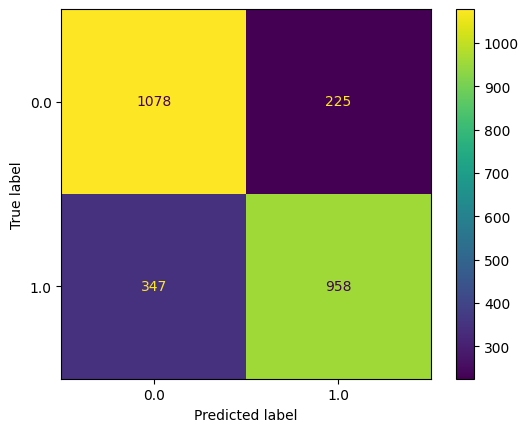

In [111]:
cmrf_obj.plot()

### Prédictions sur le fichier test

In [83]:
test.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
0,27.0,0.0,0.0,0.0,0.0,0.0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,False,Nelly Carsoning
1,19.0,0.0,9.0,0.0,2823.0,0.0,0018_01,Earth,False,F/4/S,TRAPPIST-1e,False,Lerome Peckers
2,31.0,0.0,0.0,0.0,0.0,0.0,0019_01,Europa,True,C/0/S,55 Cancri e,False,Sabih Unhearfus
3,38.0,0.0,6652.0,0.0,181.0,585.0,0021_01,Europa,False,C/1/S,TRAPPIST-1e,False,Meratz Caltilter
4,20.0,10.0,0.0,635.0,0.0,0.0,0023_01,Earth,False,F/5/S,TRAPPIST-1e,False,Brence Harperez


In [84]:
test.drop('PassengerId', inplace=True, axis=1)
test.drop('Name', inplace=True, axis=1)

In [85]:
test.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet,CryoSleep,Cabin,Destination,VIP
0,27.0,0.0,0.0,0.0,0.0,0.0,Earth,True,G/3/S,TRAPPIST-1e,False
1,19.0,0.0,9.0,0.0,2823.0,0.0,Earth,False,F/4/S,TRAPPIST-1e,False
2,31.0,0.0,0.0,0.0,0.0,0.0,Europa,True,C/0/S,55 Cancri e,False
3,38.0,0.0,6652.0,0.0,181.0,585.0,Europa,False,C/1/S,TRAPPIST-1e,False
4,20.0,10.0,0.0,635.0,0.0,0.0,Earth,False,F/5/S,TRAPPIST-1e,False


In [86]:
test = pd.get_dummies(test, columns=obj)

In [87]:
test.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,...,Cabin_G/997/S,Cabin_T/0/S,Cabin_T/1/S,Cabin_T/3/S,Cabin_T/4/P,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
0,27.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,19.0,0.0,9.0,0.0,2823.0,0.0,1,0,0,1,...,0,0,0,0,0,0,0,1,1,0
2,31.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3,38.0,0.0,6652.0,0.0,181.0,585.0,0,1,0,1,...,0,0,0,0,0,0,0,1,1,0
4,20.0,10.0,0.0,635.0,0.0,0.0,1,0,0,1,...,0,0,0,0,0,0,0,1,1,0


Pas le même nombre de colonnes, on doit donc rajouter celles qui ne sont pas présentes. En effet, cela est dû aux dummies car le nombre de valeurs possibles pour les colonnes de type texte est plus grand dans le jeu de données train que test 


In [98]:
# Get missing columns in the training test
missing_cols = set( X_train.columns ) - set( test.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    test[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
test = test[X_train.columns]

C:\Users\coren\AppData\Local\Temp\ipykernel_16012\2306676666.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test[c] = 0
C:\Users\coren\AppData\Local\Temp\ipykernel_16012\2306676666.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test[c] = 0
C:\Users\coren\AppData\Local\Temp\ipykernel_16012\2306676666.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. 

In [99]:
test.shape

(4277, 6576)

In [105]:
y_predrfFinal = rf_clf.predict(test)

In [107]:
y_predrfFinal

array([0., 0., 1., ..., 1., 1., 1.])

## 2 - Avec un réseau de neurones

pour une prochaine fois 